### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pytspl import load_dataset, SCPlot

sc, coordinates, _ = load_dataset("paper")
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


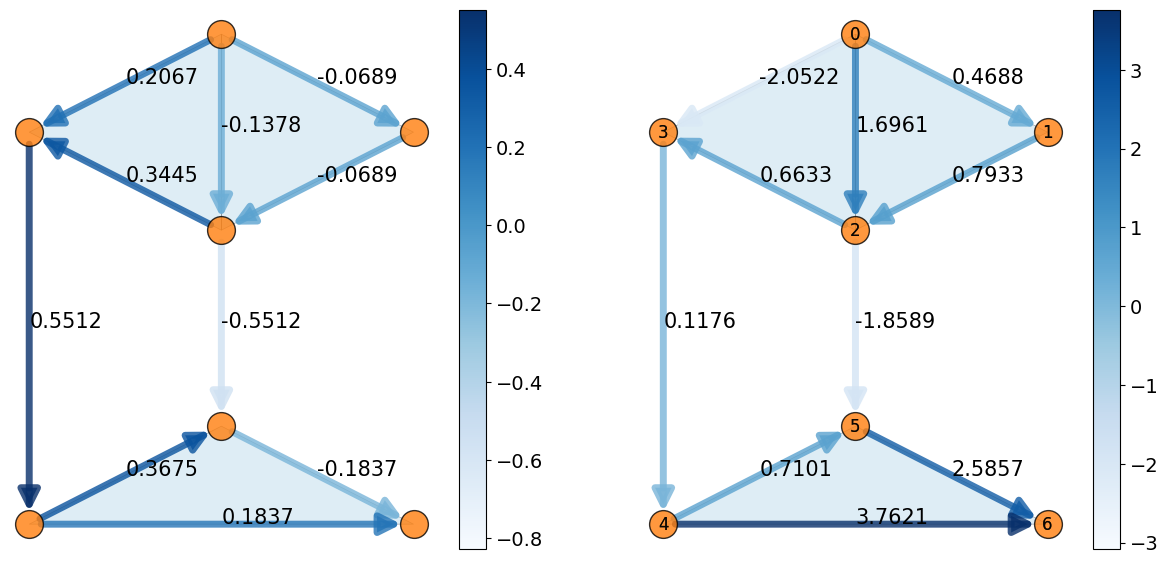

In [3]:
f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([0.4688, 1.6961, -2.0522, 0.7933, 0.6633, -1.8589, 0.1176, 0.7101, 3.7621, 2.5857])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

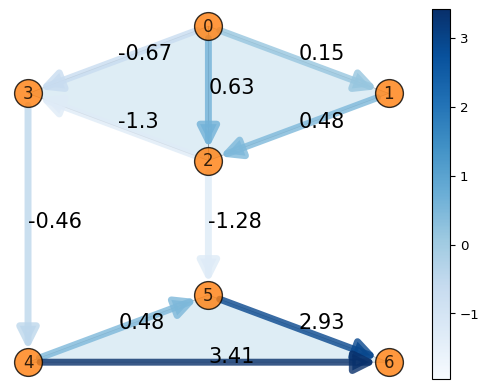

In [4]:
f_g = sc.get_hodgedecomposition(flow=f, component="gradient", round_fig=False)
f_c = sc.get_hodgedecomposition(flow=f, component="curl", round_fig=False)
scplot.draw_network(edge_flow=np.round(f_g, 2))

In [5]:
from pytspl.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

(CVXPY) Jul 22 06:52:03 PM: Encountered unexpected exception importing solver ECOS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so, 0x0002): tried: '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (no such file), '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")
(CVXPY) Jul 22 06:52:03 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pyts

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.524945436142384
Filter size: 1 - Error: 0.4745316141475573
Filter size: 2 - Error: 0.4813689649192828
Filter size: 3 - Error: 0.5048527418565033
Filter size: 4 - Error: 0.5367322722675436
Filter size: 5 - Error: 0.5013237194786567
Filter size: 6 - Error: 0.43446533579354246
Filter size: 7 - Error: 0.43489377761306186
Filter size: 8 - Error: 0.13296820531041947
Filter size: 9 - Error: 2.1428182607525521e-07


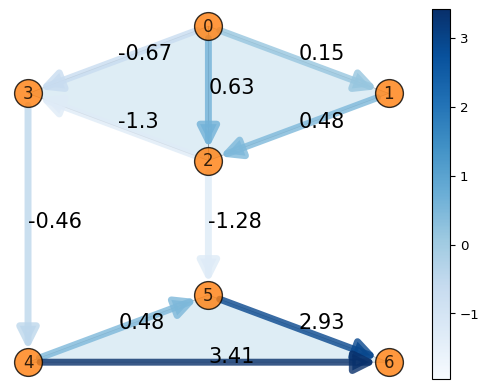

In [6]:
filter_size = 10

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

Filter size: 0 - Error: 0.524945436142384
Filter size: 1 - Error: 0.4745316141475573
Filter size: 2 - Error: 0.4813689649192828
Filter size: 3 - Error: 0.5048527418565045
Filter size: 4 - Error: 0.5367322722675322
Filter size: 5 - Error: 0.5013237194786548
Filter size: 6 - Error: 0.4344653357987963
Filter size: 7 - Error: 0.4348937776192564
Filter size: 8 - Error: 0.13296820581638377
Filter size: 9 - Error: 3.9205927398680057e-07
Filter size: 10 - Error: 6.665654682630143e-07
Filter size: 11 - Error: 1.4587655029252898e-07
Filter size: 12 - Error: 7.877504566161854e-07
Filter size: 13 - Error: 5.728488018599928e-07
Filter size: 14 - Error: 8.247693679701839e-07
Filter size: 15 - Error: 6.215114900376884e-06
Filter size: 0 - Error: 0.9105007391498801
Filter size: 1 - Error: 0.9189324739856071
Filter size: 2 - Error: 0.9633681624628962
Filter size: 3 - Error: 0.955140810137502
Filter size: 4 - Error: 0.9758580503795007
Filter size: 5 - Error: 0.941181891068398
Filter size: 6 - Error: 0.8

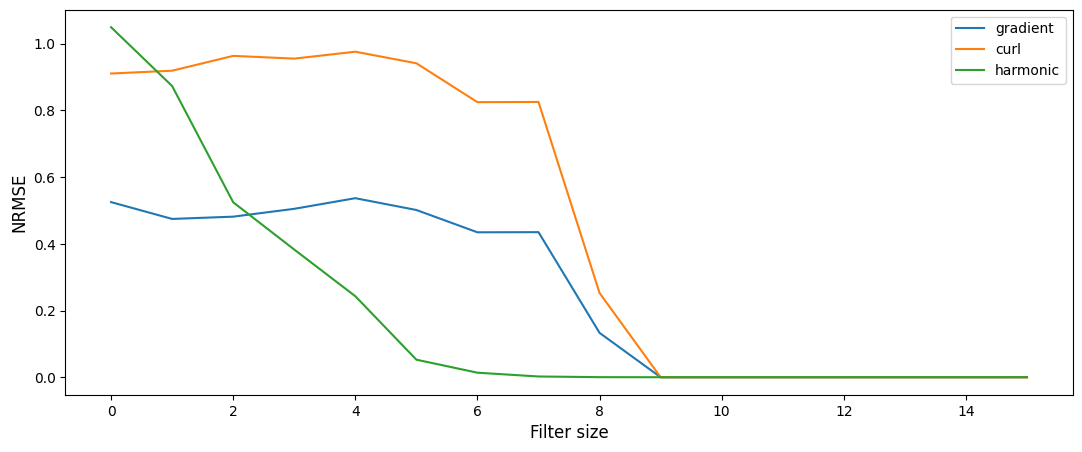

In [7]:
import matplotlib.pyplot as plt

filter_size = 16
plt.figure(figsize=(13, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="harmonic")


# x-axis with fontsize 12
plt.xlabel("Filter size", fontsize=12)
# y-axis
plt.ylabel("NRMSE", fontsize=12)

plt.legend()

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.5062219222281088
Filter size: 1 - Error: 0.3123287994810451
Filter size: 2 - Error: 0.1767192105137419
Filter size: 3 - Error: 0.10394164592496484
Filter size: 4 - Error: 0.044693735009112945
Filter size: 5 - Error: 0.0037452937925311946
Filter size: 6 - Error: 2.1129881119818267e-12
Filter size: 7 - Error: 1.2848764348414176e-11
Filter size: 8 - Error: 6.784691475963996e-11
Filter size: 9 - Error: 1.7066295335979697e-10
Filter size: 10 - Error: 1.4471041850543963e-09
Filter size: 11 - Error: 1.0589449089146096e-08
Filter size: 12 - Error: 2.8756430310001764e-08
Filter size: 13 - Error: 1.7404756856397483e-07
Filter size: 14 - Error: 1.2204928534044443e-06
Filter size: 15 - Error: 3.73297191458967e-06


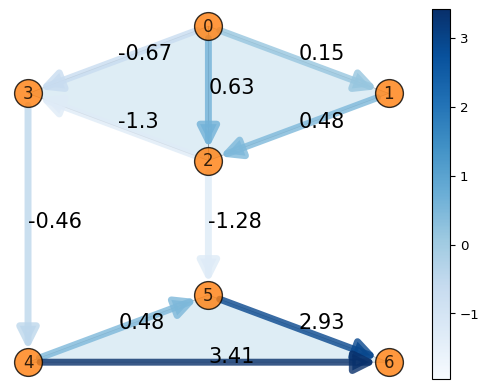

In [8]:
filter_range = 16

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

#### General Filter

Filter size: 0 - Error: 0.5062219222281088
Filter size: 0 - Error: 1.4769300846529563


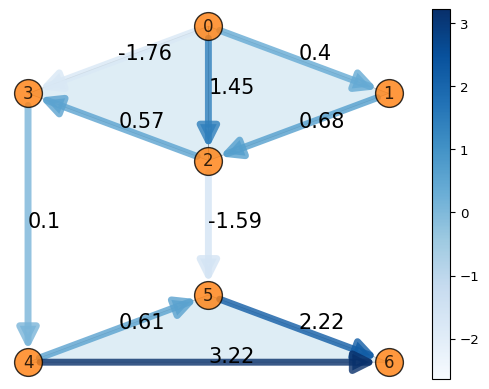

In [9]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

scplot.draw_network(edge_flow=np.round(f_est_g, 2))

In [10]:
lsfilter.history

{'L1': {'filter': array([[0.85714286, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.85714286, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.85714286, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.85714286, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.85714286,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.85714286, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.85714286, 0.        , 0.        , 0.        